## Data Processing

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("P587 DATASET.csv")

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [70]:
df.shape

(2011, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [43]:
df.duplicated().sum()

np.int64(0)

In [25]:
#  Normalize stock price data 
price_columns = ['Open', 'High', 'Low', 'Close']
price_columns = [col for col in price_columns if col in df.columns]
price_columns

['Open', 'High', 'Low', 'Close']

In [26]:
# Apply MinMaxScaler normalization (0 to 1)
scaler = MinMaxScaler()
df[price_columns] = scaler.fit_transform(df[price_columns])
df[price_columns]

,Open,High,Low,Close
Date,,,,
2012-01-03,0.012989,0.007780,0.014647,0.012545
2012-01-04,0.013353,0.009094,0.014819,0.013884
2012-01-05,0.016353,0.011428,0.016896,0.016666
2012-01-06,0.019274,0.013961,0.020910,0.019314
2012-01-09,0.022747,0.016976,0.022216,0.018908
...,...,...,...,...
2019-12-23,0.955069,0.958967,0.966753,0.968099
2019-12-24,0.972719,0.961669,0.977693,0.969244
2019-12-26,0.973271,0.983156,0.985329,0.993170


In [27]:
# Feature Engineering 
# Moving Averages (7-day and 30-day)
for window in [7, 30]:
    for col in price_columns:
        df[f'{col}_MA_{window}'] = df[col].rolling(window=window).mean()
df[f'{col}_MA_{window}'] 


Date
2012-01-03         NaN
2012-01-04         NaN
2012-01-05         NaN
2012-01-06         NaN
2012-01-09         NaN
                ...   
2019-12-23    0.903200
2019-12-24    0.906321
2019-12-26    0.910273
2019-12-27    0.913855
2019-12-30    0.917939
Name: Close_MA_30, Length: 2011, dtype: float64

In [73]:
 #Volatility (Standard Deviation over rolling window)
for window in [7, 30]:
    for col in price_columns:
        df[f'{col}_Volatility_{window}'] = df[col].rolling(window=window).std()
df[f'{col}_Volatility_{window}']

Date
2012-01-03         NaN
2012-01-04         NaN
2012-01-05         NaN
2012-01-06         NaN
2012-01-09         NaN
                ...   
2019-12-23    6.938819
2019-12-24    7.381592
2019-12-26    8.131139
2019-12-27    8.786240
2019-12-30    9.376821
Name: Close_Volatility_30, Length: 2011, dtype: float64

In [32]:
#  Final Clean-up 
df.dropna(inplace=True)

print("\nProcessed Data Sample:")
print(df)


Processed Data Sample:
                Open      High       Low     Close   Adj Close     Volume  \
Date                                                                        
2012-02-14  0.070727  0.066313  0.071641  0.072074   62.892056  115099600   
2012-02-15  0.076545  0.076403  0.068510  0.064929   61.436600  376530000   
2012-02-16  0.062750  0.063497  0.062222  0.067680   61.997032  236138000   
2012-02-17  0.069787  0.065234  0.070599  0.067626   61.985954  133951300   
2012-02-21  0.072072  0.069504  0.072941  0.075340   63.557446  151398800   
...              ...       ...       ...       ...         ...        ...   
2019-12-23  0.955069  0.958967  0.966753  0.968099  282.054138   24643000   
2019-12-24  0.972719  0.961669  0.977693  0.969244  282.322266   12119700   
2019-12-26  0.973271  0.983156  0.985329  0.993170  287.923645   23280300   
2019-12-27  1.000000  1.000000  1.000000  0.992704  287.814392   36566500   
2019-12-30  0.992957  0.994597  0.987559  1.000000  

In [13]:
# Save the processed dataset
df.to_csv("Processed_Stock_Data.csv", index=False)
print(" Data preprocessing complete. Saved as 'Processed_Stock_Data.csv'")


 Data preprocessing complete. Saved as 'Processed_Stock_Data.csv'


## EDA(Exploratory Data Analysis)

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

In [78]:
df = pd.read_csv("Processed_Stock_Data.csv")

In [79]:
print("Data Overview:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 1982 non-null   object 
 1   Open                 1982 non-null   float64
 2   High                 1982 non-null   float64
 3   Low                  1982 non-null   float64
 4   Close                1982 non-null   float64
 5   Adj Close            1982 non-null   float64
 6   Volume               1982 non-null   int64  
 7   Open_MA_7            1982 non-null   float64
 8   High_MA_7            1982 non-null   float64
 9   Low_MA_7             1982 non-null   float64
 10  Close_MA_7           1982 non-null   float64
 11  Open_MA_30           1982 non-null   float64
 12  High_MA_30           1982 non-null   float64
 13  Low_MA_30            1982 non-null   float64
 14  Close_MA_30          1982 non-null   float64
 15  Open_Volatility_7    19

In [58]:
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [80]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df.set_index('Date', inplace=True)

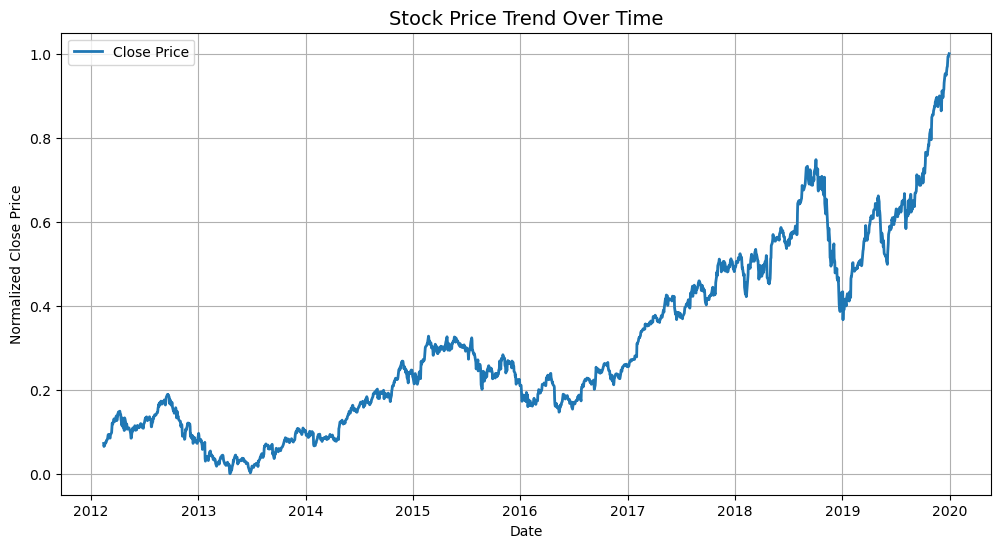

In [81]:
if 'Close' in df.columns:
    plt.figure(figsize=(12,6))
    plt.plot(df.index, df['Close'], label='Close Price', linewidth=2)
    plt.title("Stock Price Trend Over Time", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Normalized Close Price")
    plt.legend()
    plt.grid(True)
    plt.show()

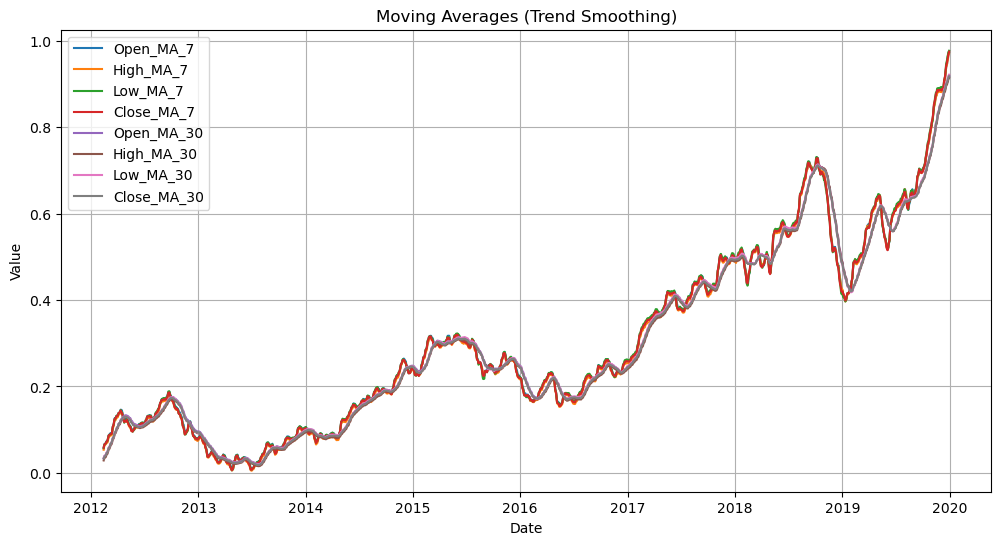

In [82]:
ma_cols = [col for col in df.columns if '_MA_' in col]

if ma_cols:
    plt.figure(figsize=(12,6))
    for col in ma_cols:
        plt.plot(df.index, df[col], label=col)
    plt.title("Moving Averages (Trend Smoothing)")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

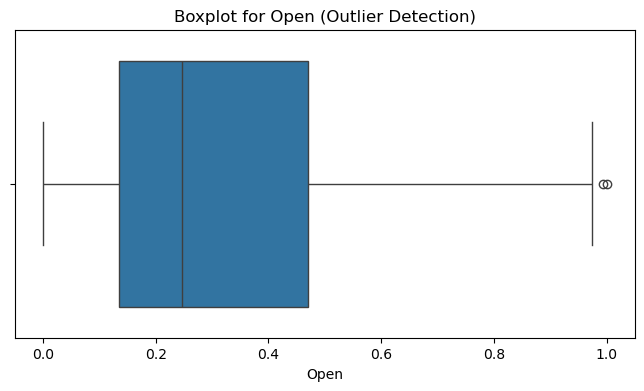

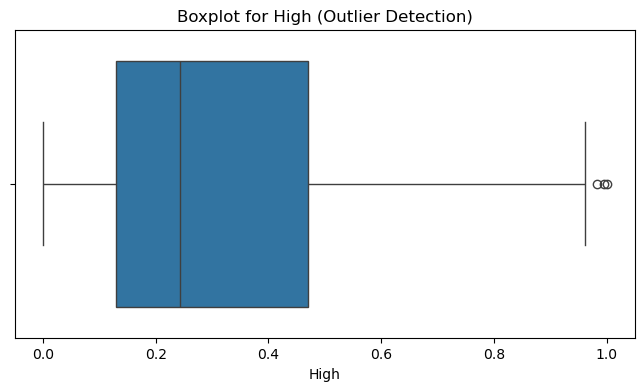

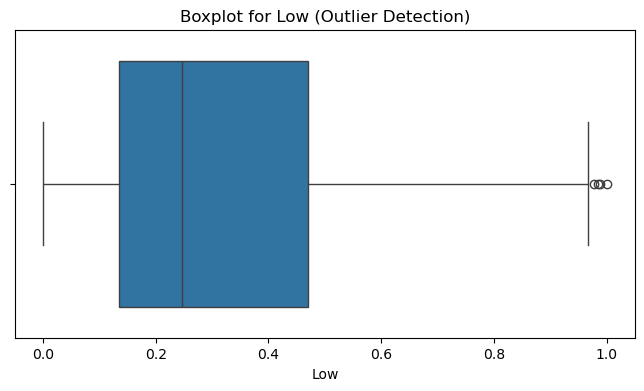

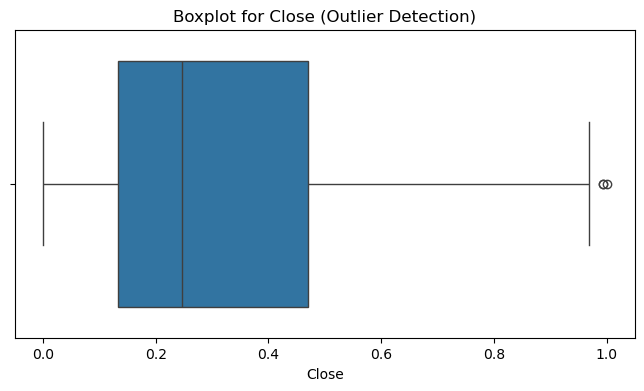

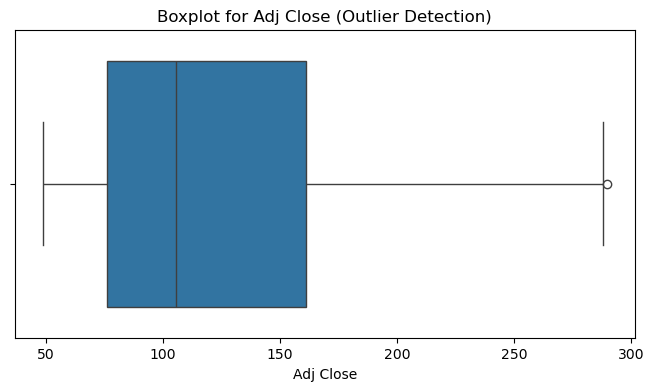

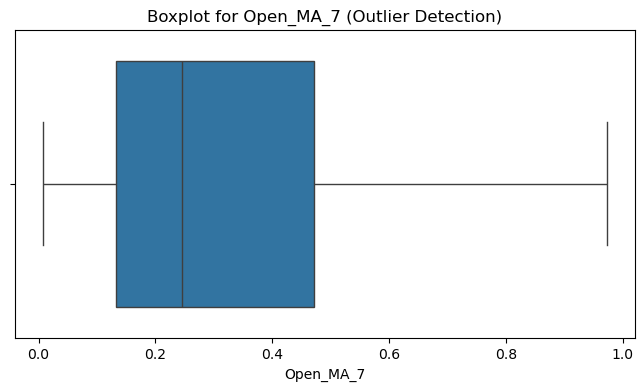

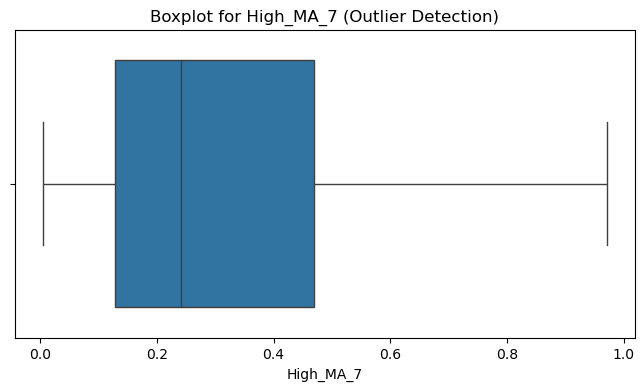

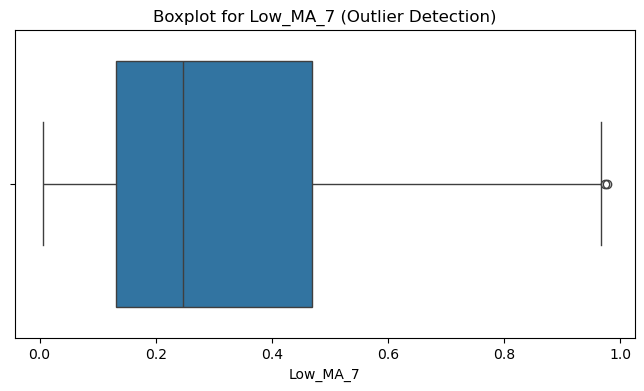

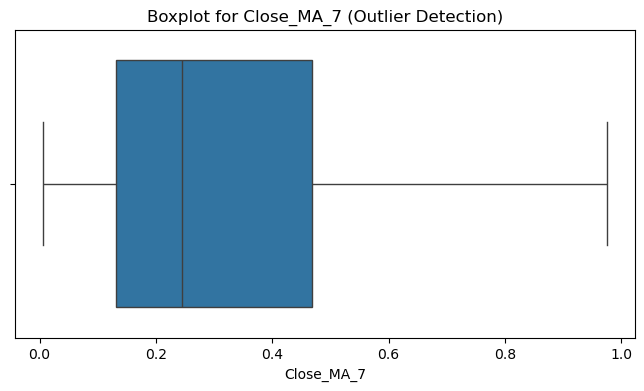

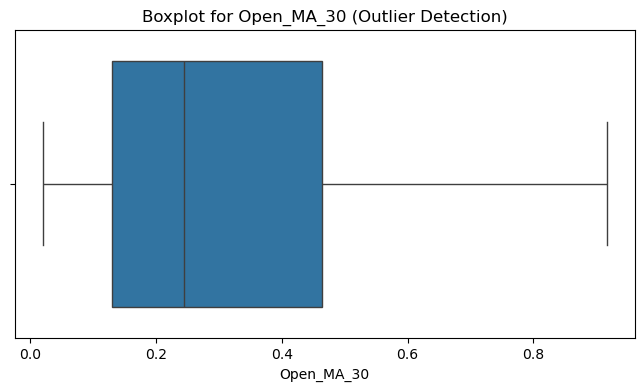

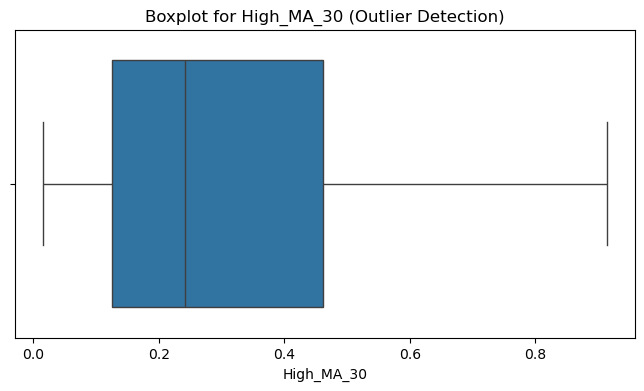

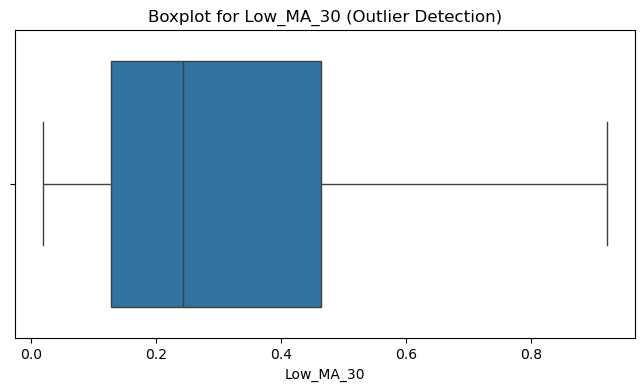

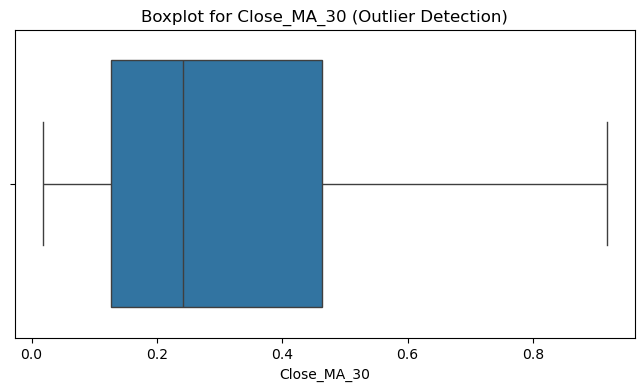

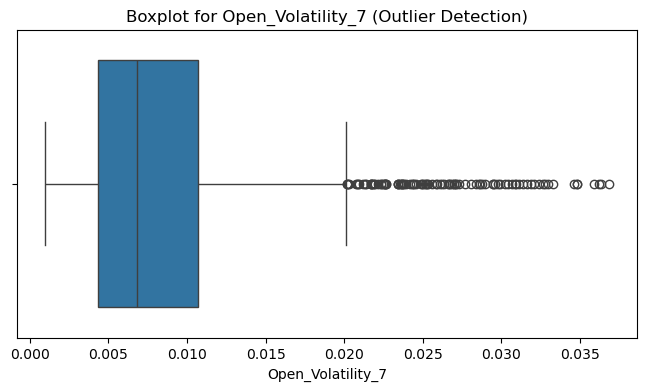

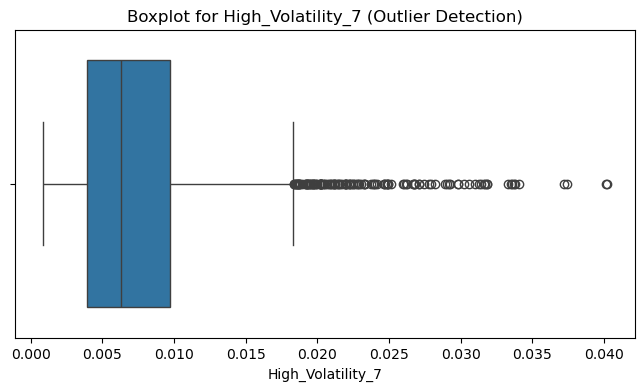

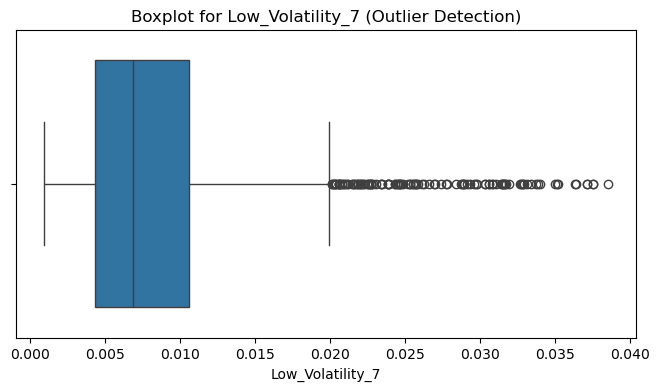

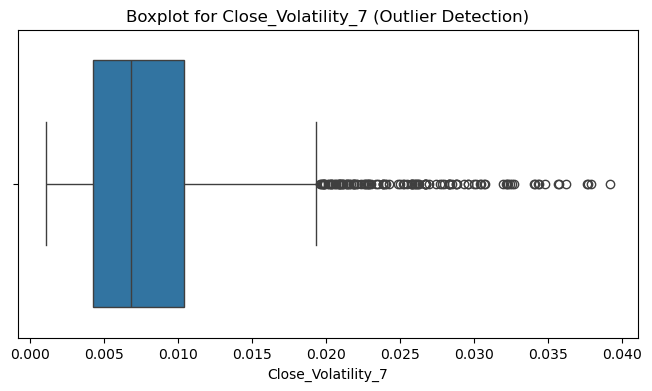

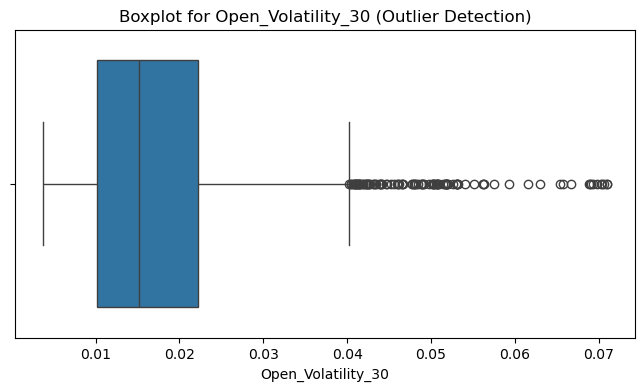

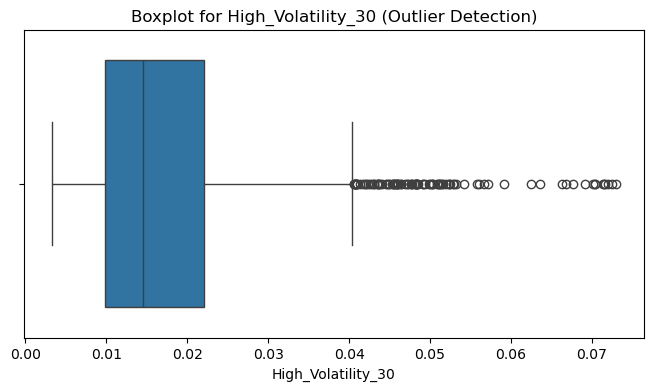

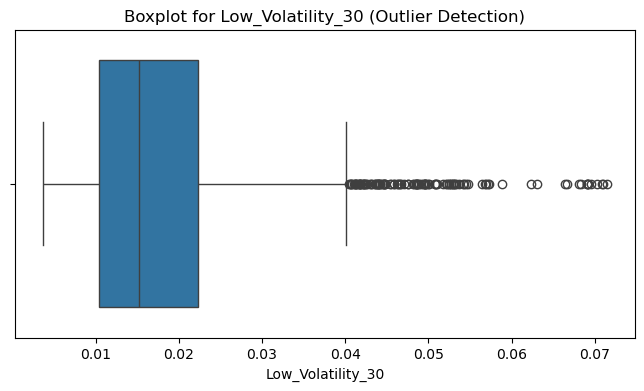

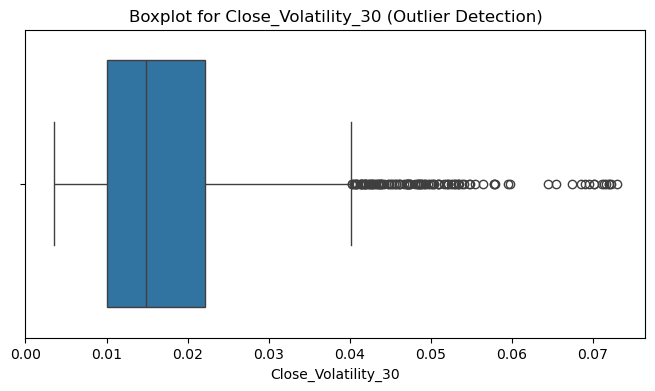

Open: 2 outliers detected
High: 3 outliers detected
Low: 4 outliers detected
Close: 3 outliers detected
Adj Close: 1 outliers detected
Open_MA_7: 0 outliers detected
High_MA_7: 0 outliers detected
Low_MA_7: 2 outliers detected
Close_MA_7: 0 outliers detected
Open_MA_30: 0 outliers detected
High_MA_30: 0 outliers detected
Low_MA_30: 0 outliers detected
Close_MA_30: 0 outliers detected
Open_Volatility_7: 98 outliers detected
High_Volatility_7: 127 outliers detected
Low_Volatility_7: 118 outliers detected
Close_Volatility_7: 115 outliers detected
Open_Volatility_30: 107 outliers detected
High_Volatility_30: 97 outliers detected
Low_Volatility_30: 115 outliers detected
Close_Volatility_30: 109 outliers detected


In [83]:


# Detect outliers using IQR (Interquartile Range) Method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Apply only to price-related columns
price_cols = [col for col in df.columns if any(x in col for x in ['Open', 'High', 'Low', 'Close'])]

# Visualize Outliers using Boxplot
for col in price_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col} (Outlier Detection)")
    plt.show()

# Count how many outliers per column
for col in price_cols:
    outliers = detect_outliers_iqr(df[col])
    print(f"{col}: {outliers.sum()} outliers detected")


In [68]:
corelation=df.corr(numeric_only=True)
corelation

,Open,High,Low,Close,Adj Close,Volume,Daily_Return
Open,1.000000,0.999782,0.999718,0.999496,0.998895,-0.557956,0.014677
High,0.999782,1.000000,0.999657,0.999748,0.999171,-0.554909,0.023773
Low,0.999718,0.999657,1.000000,0.999769,0.999179,-0.563426,0.026693
Close,0.999496,0.999748,0.999769,1.000000,0.999402,-0.559654,0.036874
Adj Close,0.998895,0.999171,0.999179,0.999402,1.000000,-0.566332,0.035419
Volume,-0.557956,-0.554909,-0.563426,-0.559654,-0.566332,1.000000,-0.063746
Daily_Return,0.014677,0.023773,0.026693,0.036874,0.035419,-0.063746,1.000000


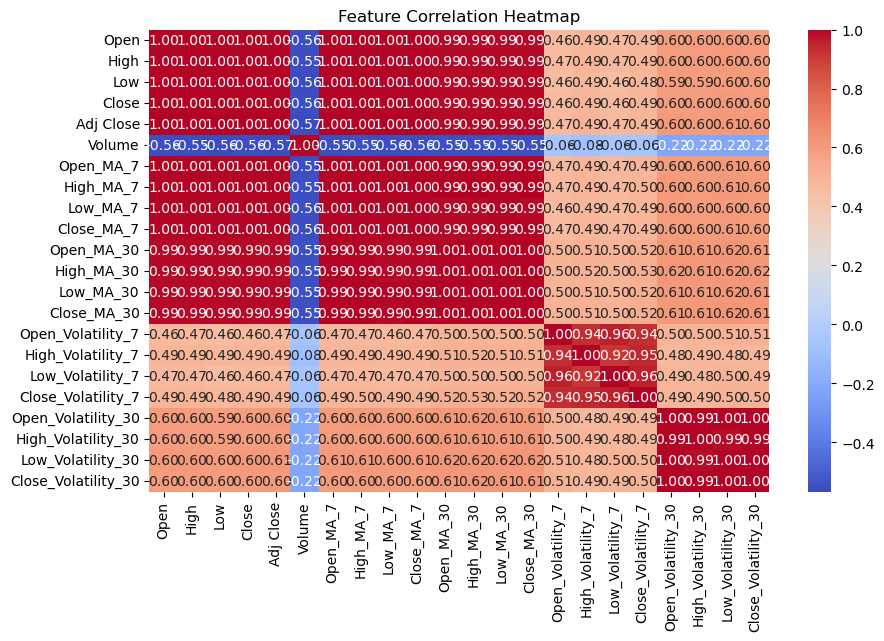

In [84]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

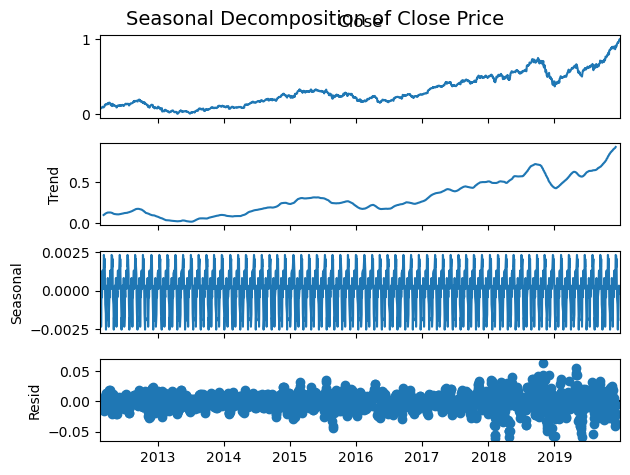

In [85]:
if 'Close' in df.columns and isinstance(df.index, pd.DatetimeIndex):
    result = seasonal_decompose(df['Close'], model='additive', period=30)
    result.plot()
    plt.suptitle("Seasonal Decomposition of Close Price", fontsize=14)
    plt.show()

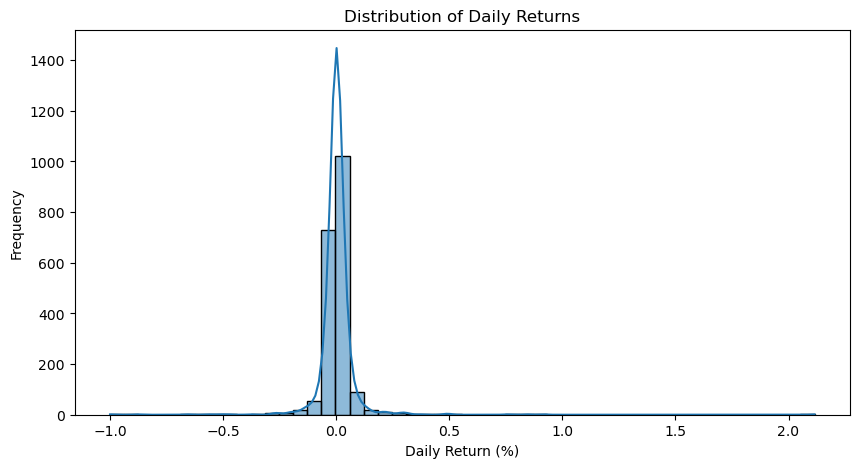

In [86]:
if 'Close' in df.columns:
    df['Daily_Return'] = df['Close'].pct_change()
    plt.figure(figsize=(10,5))
    sns.histplot(df['Daily_Return'].dropna(), bins=50, kde=True)
    plt.title("Distribution of Daily Returns")
    plt.xlabel("Daily Return (%)")
    plt.ylabel("Frequency")
    plt.show()

## Feature Engineering 

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf


In [2]:
df = pd.read_csv("P587 DATASET.csv")


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [4]:
sp500 = yf.download("^GSPC", start=df.index.min(), end=df.index.max())
sp500 = sp500[['Close']].rename(columns={'Close': 'SP500_Close'})


C:\Users\User\AppData\Local\Temp\ipykernel_3788\857094188.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start=df.index.min(), end=df.index.max())
[*********************100%***********************]  1 of 1 completed


In [5]:
inflation = pd.DataFrame(index=df.index)
inflation['Inflation_Rate'] = 0.05 + 0.005 * np.sin(np.arange(len(inflation))/30)


In [6]:
df = df.join(sp500['SP500_Close'], how='left')
df = df.join(inflation, how='left')


In [7]:
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_3788\3302063104.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_3788\3302063104.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [8]:
# Daily percentage change of Apple and S&P 500
df['Stock_Return'] = df['Close'].pct_change()
df['SP500_Return'] = df['^GSPC'].pct_change()

# Rolling correlation (relationship between Apple and market)
df['Market_Correlation'] = df['Stock_Return'].rolling(window=30).corr(df['SP500_Return'])

In [9]:
df.to_csv("Feature_Enhanced_Stock_Data.csv")
print(" External features added successfully and saved as Feature_Enhanced_Stock_Data.csv")


 External features added successfully and saved as Feature_Enhanced_Stock_Data.csv


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your feature-enhanced file
df = pd.read_csv("Feature_Enhanced_Stock_Data.csv")

# Ensure Date column exists and is datetime
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

# Check structure
print(df.columns)
print(df.index[:5])


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '^GSPC',
       'Inflation_Rate', 'Stock_Return', 'SP500_Return', 'Market_Correlation'],
      dtype='object')
DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [11]:
# Check that the columns exist
for col in ['Close', 'SP500_Close', 'Market_Correlation']:
    if col not in df.columns:
        print(f" Missing column: {col}")
    else:
        print(f" Found column: {col}")


 Found column: Close
 Missing column: SP500_Close
 Found column: Market_Correlation


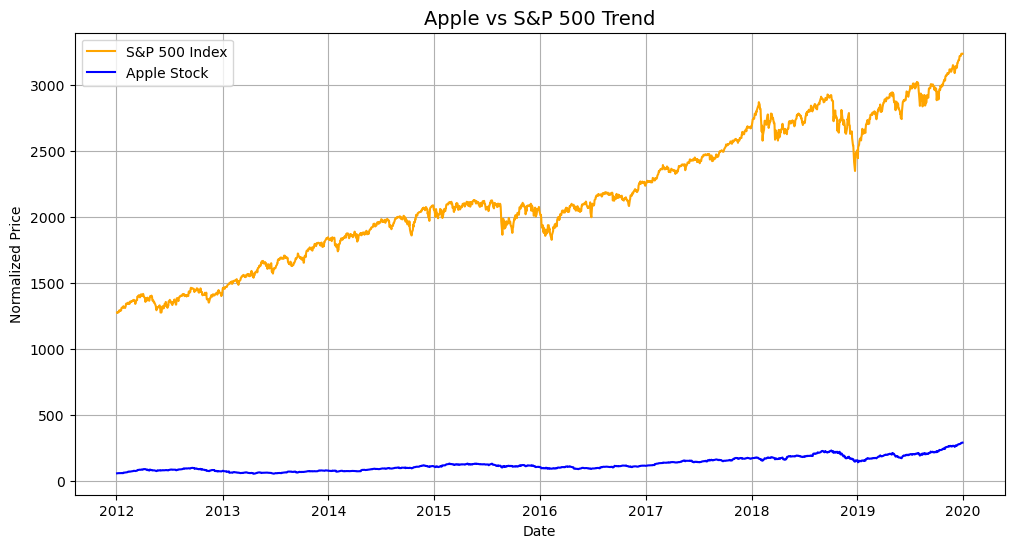

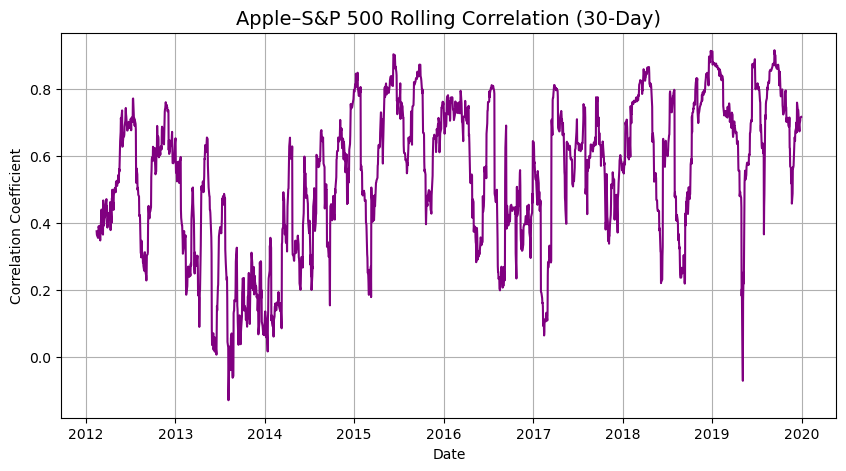

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df['^GSPC'], label='S&P 500 Index', color='orange')
plt.plot(df.index, df['Close'], label='Apple Stock', color='blue')
plt.title("Apple vs S&P 500 Trend", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(df.index, df['Market_Correlation'], color='purple')
plt.title("Apple–S&P 500 Rolling Correlation (30-Day)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Correlation Coefficient")
plt.grid(True)
plt.show()

In [13]:
print(df[['^GSPC', 'Close', 'Market_Correlation']].head())

                  ^GSPC      Close  Market_Correlation
Date                                                  
2012-01-03  1277.060059  58.747143                 NaN
2012-01-04  1277.300049  59.062859                 NaN
2012-01-05  1281.060059  59.718571                 NaN
2012-01-06  1277.810059  60.342857                 NaN
2012-01-09  1280.699951  60.247143                 NaN


## statistical models

In [14]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


In [15]:
df = pd.read_csv("Feature_Enhanced_Stock_Data.csv")

# Ensure Date is datetime and sorted
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Target variable
y = df['Close']


In [16]:
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]


In [17]:
model_arima = ARIMA(train, order=(5,1,0))   # (p,d,q)
model_fit = model_arima.fit()

# Forecast
forecast_arima = model_fit.forecast(steps=len(test))


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

In [18]:
mae = mean_absolute_error(test, forecast_arima)
rmse = np.sqrt(mean_squared_error(test, forecast_arima))

print(f"ARIMA MAE: {mae:.4f}")
print(f"ARIMA RMSE: {rmse:.4f}")


ARIMA MAE: 25.3614
ARIMA RMSE: 34.0063


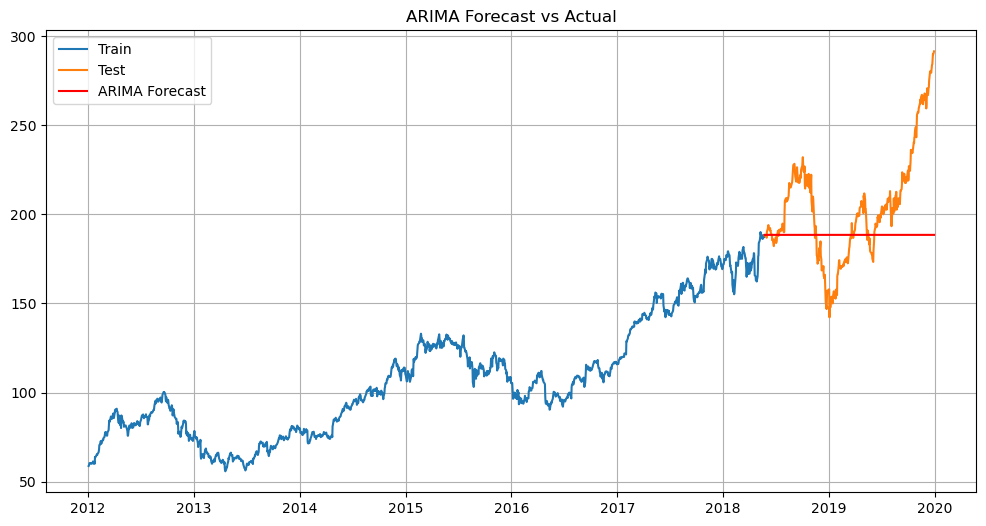

In [19]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast_arima, label='ARIMA Forecast', color='red')
plt.title("ARIMA Forecast vs Actual")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
model_sarima = SARIMAX(train, order=(2,1,2), seasonal_order=(1,1,1,12))
model_sarima_fit = model_sarima.fit(disp=False)

forecast_sarima = model_sarima_fit.forecast(steps=len(test))

rmse_sarima = np.sqrt(mean_squared_error(test, forecast_sarima))
print(f"SARIMA RMSE: {rmse_sarima:.4f}")


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA RMSE: 26.3603


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## machine learning

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [23]:
X = df.drop(['Close'], axis=1)
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [24]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [25]:
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
